In [1]:
from sklearn.linear_model import SGDClassifier
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Visualization Library
import matplotlib.pyplot as plt 
import seaborn as sns
from collections import Counter
import tensorflow as tf
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
import pdb
import tensorflow.contrib.keras as keras
from tensorflow.contrib.keras import losses,optimizers,metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report
from tensorboard.plugins.hparams import api as hp
import os.path
import math   
import statsmodels.api as sm
from statsmodels.formula.api import ols

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [2]:
train_df=pd.read_csv("original_data/train.csv")
test_df=pd.read_csv("original_data/test.csv")
combined_df= pd.concat([train_df,test_df],axis=0).reset_index(drop=True)

try:
    os.stat('saved_stats')
except:
    os.mkdir('saved_stats')  
    

In [3]:
combined_df.shape

(129880, 25)

In [4]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

In [5]:
combined_df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [6]:
combined_df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,44158.700000,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,31207.377062,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16234.750000,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,38963.500000,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,71433.250000,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [7]:
combined_df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [8]:
combined_df.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [9]:
combined_df = combined_df.drop(['Unnamed: 0', 'id'], axis=1)

combined_df.columns=[each.replace(" ","_") for each in combined_df.columns]

combined_df['satisfaction_int'] = combined_df.satisfaction.eq('satisfied').mul(1)


In [10]:
num_feat = ['Age', 'Flight_Distance', 'Inflight_wifi_service',
                    'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
                    'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
                    'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
                    'Baggage_handling', 'Checkin_service', 'Inflight_service',
                    'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']

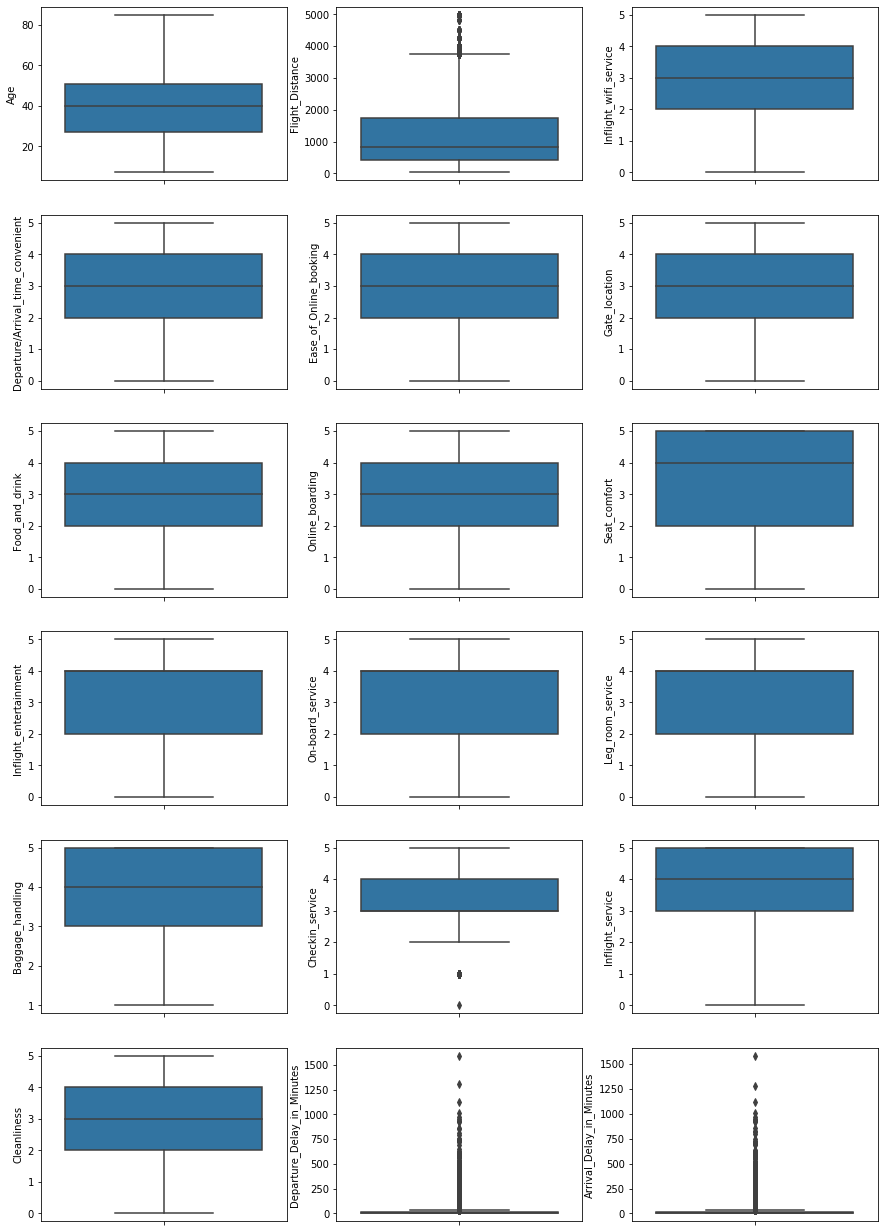

In [11]:
fig = plt.figure(figsize=(15,30))
i = 1
for each_feature in num_feat:
    fig.add_subplot(8,3,i)
    sns.boxplot(y=combined_df[each_feature])
    i = i+1
plt.show()

In [12]:
def outlierIdentifier(dataFrame,columns):
    outlier_indices=[]
    
    for f in columns:
        
        Quartile1 = np.percentile(dataFrame[f],25)
        Quartile3 = np.percentile(dataFrame[f],75)
        interquartile_range = Quartile3-Quartile1
        outlier_step= interquartile_range * 1.5
        outlier_list_col = dataFrame[(dataFrame[f]< Quartile1 - outlier_step)|( dataFrame[f] > Quartile3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    
    outliers_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i , v in outliers_indices.items() if v>2 )
    return multiple_outliers

In [13]:
# remove outliers
combined_df = combined_df.drop(outlierIdentifier(combined_df,[ 'Age', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes',
       'Arrival_Delay_in_Minutes']),axis = 0).reset_index(drop = True)

In [14]:
combined_df.isna().any()

Gender                               False
Customer_Type                        False
Age                                  False
Type_of_Travel                       False
Class                                False
Flight_Distance                      False
Inflight_wifi_service                False
Departure/Arrival_time_convenient    False
Ease_of_Online_booking               False
Gate_location                        False
Food_and_drink                       False
Online_boarding                      False
Seat_comfort                         False
Inflight_entertainment               False
On-board_service                     False
Leg_room_service                     False
Baggage_handling                     False
Checkin_service                      False
Inflight_service                     False
Cleanliness                          False
Departure_Delay_in_Minutes           False
Arrival_Delay_in_Minutes              True
satisfaction                         False
satisfactio

In [15]:

combined_df["Arrival_Delay_in_Minutes"]=combined_df["Arrival_Delay_in_Minutes"].fillna(np.mean(combined_df["Arrival_Delay_in_Minutes"]))


In [16]:
combined_df.shape

(129835, 24)

In [17]:
combined_df.describe()

,Age,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction_int
count,129835.000000,129835.000000,129835.000000,129835.000000,129835.000000,129835.000000,129835.000000,129835.000000,129835.000000,129835.000000,129835.000000,129835.000000,129835.000000,129835.000000,129835.000000,129835.000000,129835.000000,129835.000000,129835.000000
mean,39.427350,1189.383248,2.728933,3.057673,2.756814,2.976994,3.204945,3.252721,3.441530,3.358224,3.383125,3.351038,3.632326,3.307067,3.642423,3.286633,14.691909,15.070293,0.434528
std,15.119663,996.364012,1.329365,1.526683,1.401669,1.278423,1.329885,1.350739,1.319265,1.334041,1.287072,1.316193,1.179969,1.265676,1.176595,1.313563,38.047336,38.385784,0.495697
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


In [18]:
columns = combined_df.columns


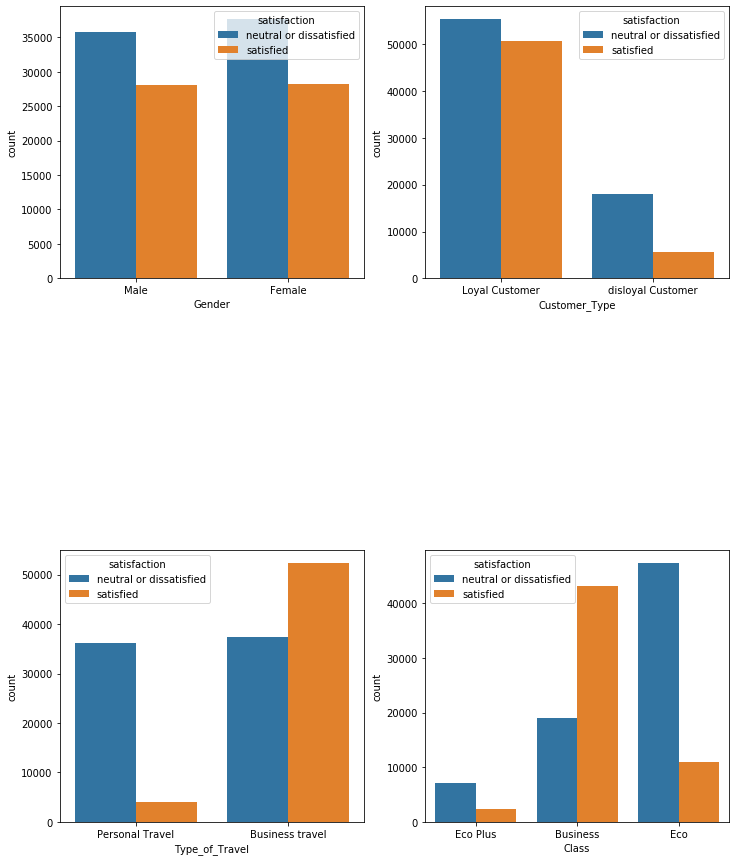

In [19]:
customer_details_columns = ['Gender', 'Customer_Type',
       'Type_of_Travel', 'Class']

fig,axes = plt.subplots(2,2,figsize=(12,15))
for i,cat in enumerate(customer_details_columns):
    
    row,col = i//2,i%2
    sns.countplot(x=cat,data=combined_df,hue='satisfaction',ax=axes[row,col])
    
plt.subplots_adjust(hspace=1)

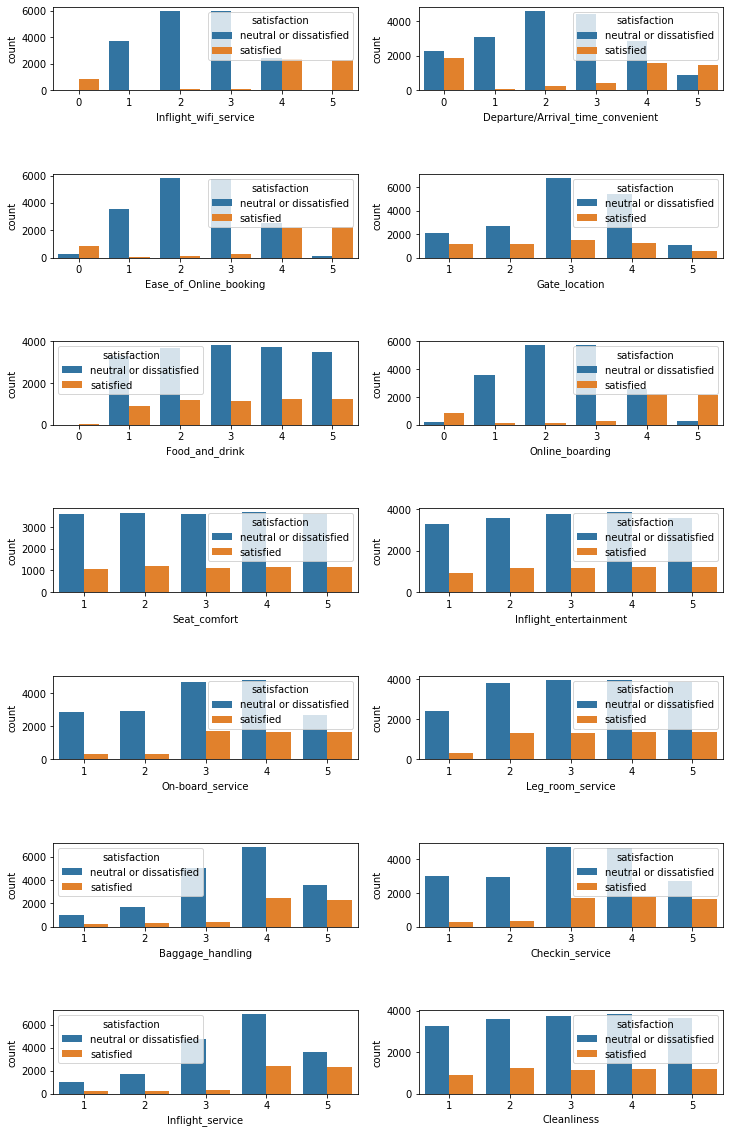

In [20]:
service_rating_columns = ['Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness']

disloyal_pax = combined_df[combined_df['Customer_Type']=='disloyal Customer']

fig,axes = plt.subplots(7,2,figsize=(12,20))
for i,cat in enumerate(service_rating_columns):
    
    row,col = i//2,i%2
    sns.countplot(x=cat,data=disloyal_pax,hue='satisfaction',ax=axes[row,col])
    
plt.subplots_adjust(hspace=1)


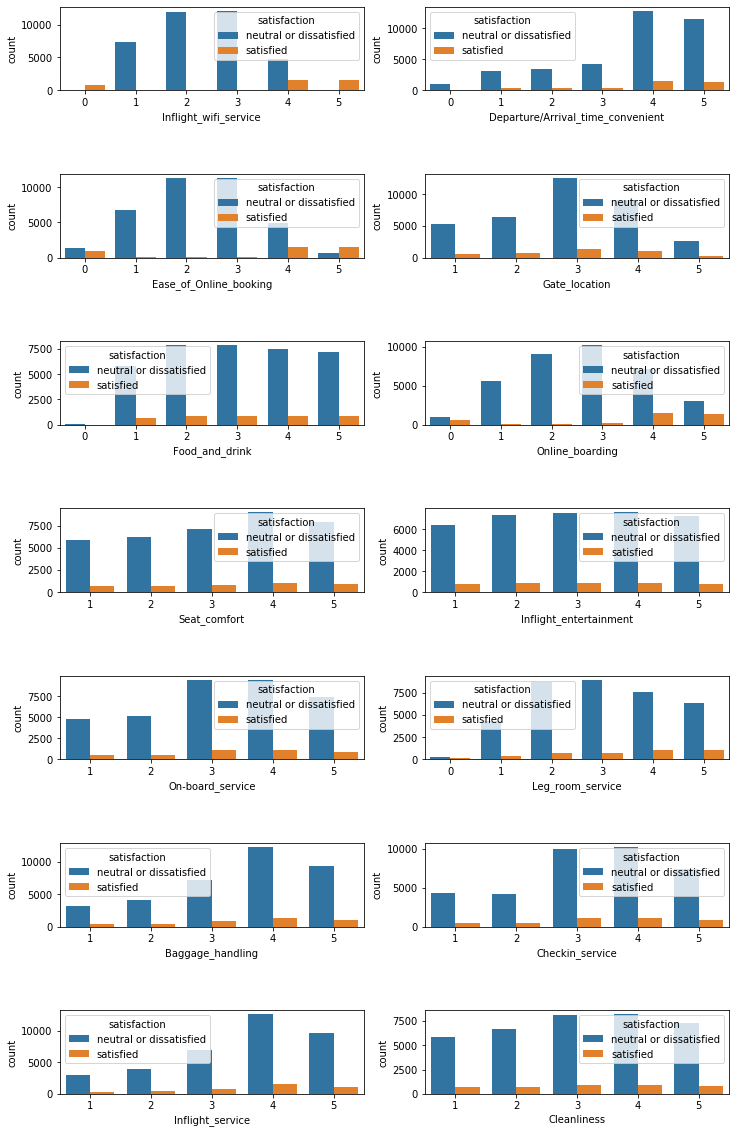

In [21]:
service_rating_columns = ['Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness']

personal_trvl_pax = combined_df[combined_df['Type_of_Travel']=='Personal Travel']

fig,axes = plt.subplots(7,2,figsize=(12,20))
for i,cat in enumerate(service_rating_columns):
    
    row,col = i//2,i%2
    sns.countplot(x=cat,data=personal_trvl_pax,hue='satisfaction',ax=axes[row,col])
    
plt.subplots_adjust(hspace=1)


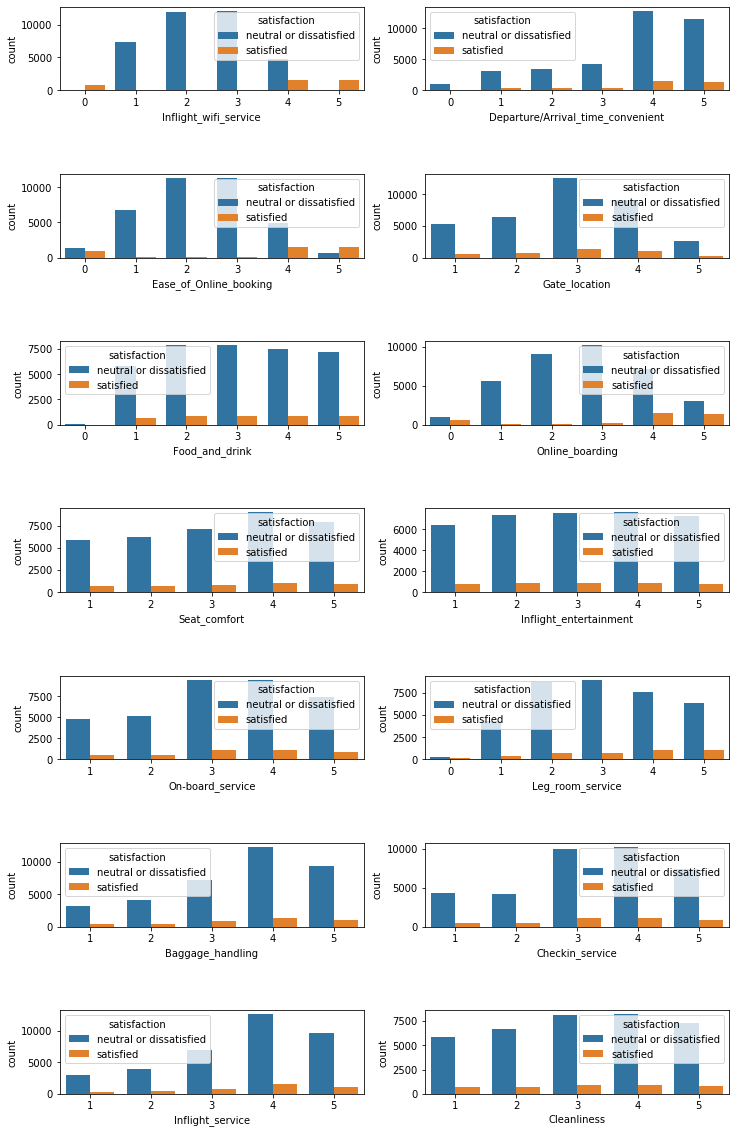

In [22]:
service_rating_columns = ['Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness']

eco_pax = combined_df[combined_df['Class']!='Business']

fig,axes = plt.subplots(7,2,figsize=(12,20))
for i,cat in enumerate(service_rating_columns):
    
    row,col = i//2,i%2
    sns.countplot(x=cat,data=personal_trvl_pax,hue='satisfaction',ax=axes[row,col])
    
plt.subplots_adjust(hspace=1)


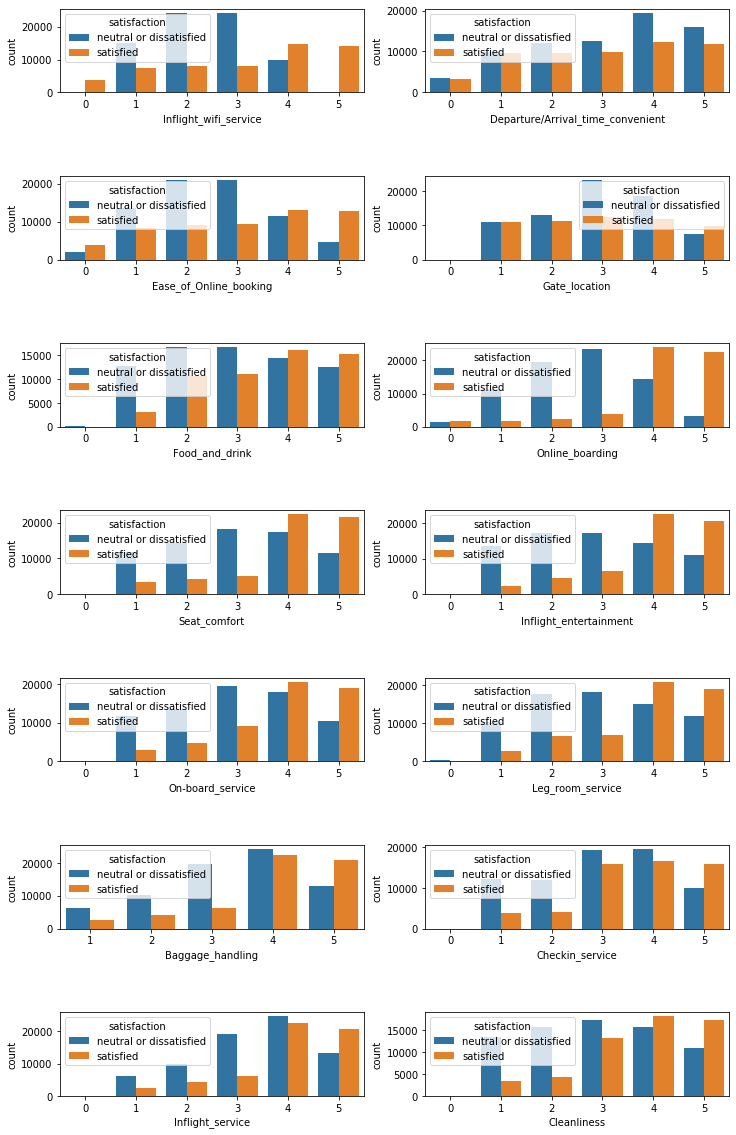

In [23]:
service_rating_columns = [ 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness']

fig,axes = plt.subplots(7,2,figsize=(12,20))
for i,cat in enumerate(service_rating_columns):
    
    row,col = i//2,i%2
    sns.countplot(x=cat,data=combined_df,hue='satisfaction',ax=axes[row,col])
    
plt.subplots_adjust(hspace=1)

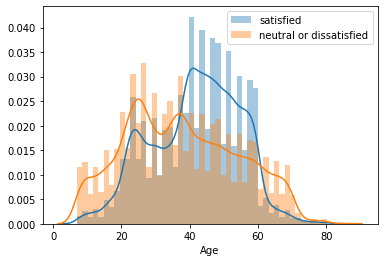

In [24]:
sns.distplot(combined_df[combined_df['satisfaction']=='satisfied'].Age, label='satisfied')
sns.distplot(combined_df[combined_df['satisfaction']!='satisfied'].Age, label='neutral or dissatisfied')
plt.legend()
plt.show()

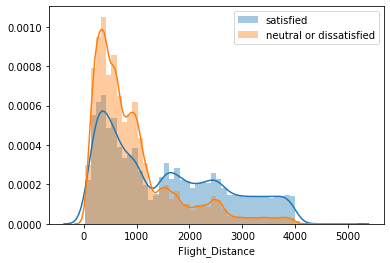

In [25]:
sns.distplot(combined_df[combined_df['satisfaction']=='satisfied'].Flight_Distance, label='satisfied')
sns.distplot(combined_df[combined_df['satisfaction']!='satisfied'].Flight_Distance, label='neutral or dissatisfied')
plt.legend()
plt.show()

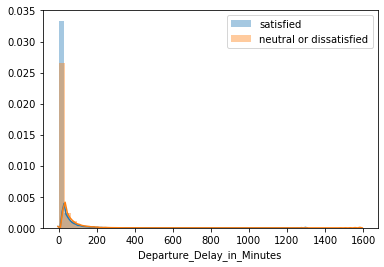

In [26]:
sns.distplot(combined_df[combined_df['satisfaction']=='satisfied'].Departure_Delay_in_Minutes, label='satisfied')
sns.distplot(combined_df[combined_df['satisfaction']!='satisfied'].Departure_Delay_in_Minutes, label='neutral or dissatisfied')
plt.legend()
plt.show()

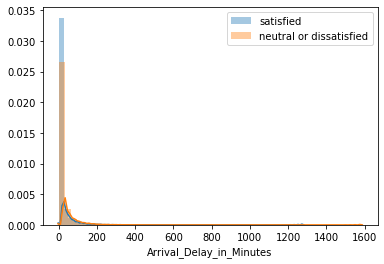

In [27]:
sns.distplot(combined_df[combined_df['satisfaction']=='satisfied'].Arrival_Delay_in_Minutes, label='satisfied')
sns.distplot(combined_df[combined_df['satisfaction']!='satisfied'].Arrival_Delay_in_Minutes, label='neutral or dissatisfied')
plt.legend()
plt.show()

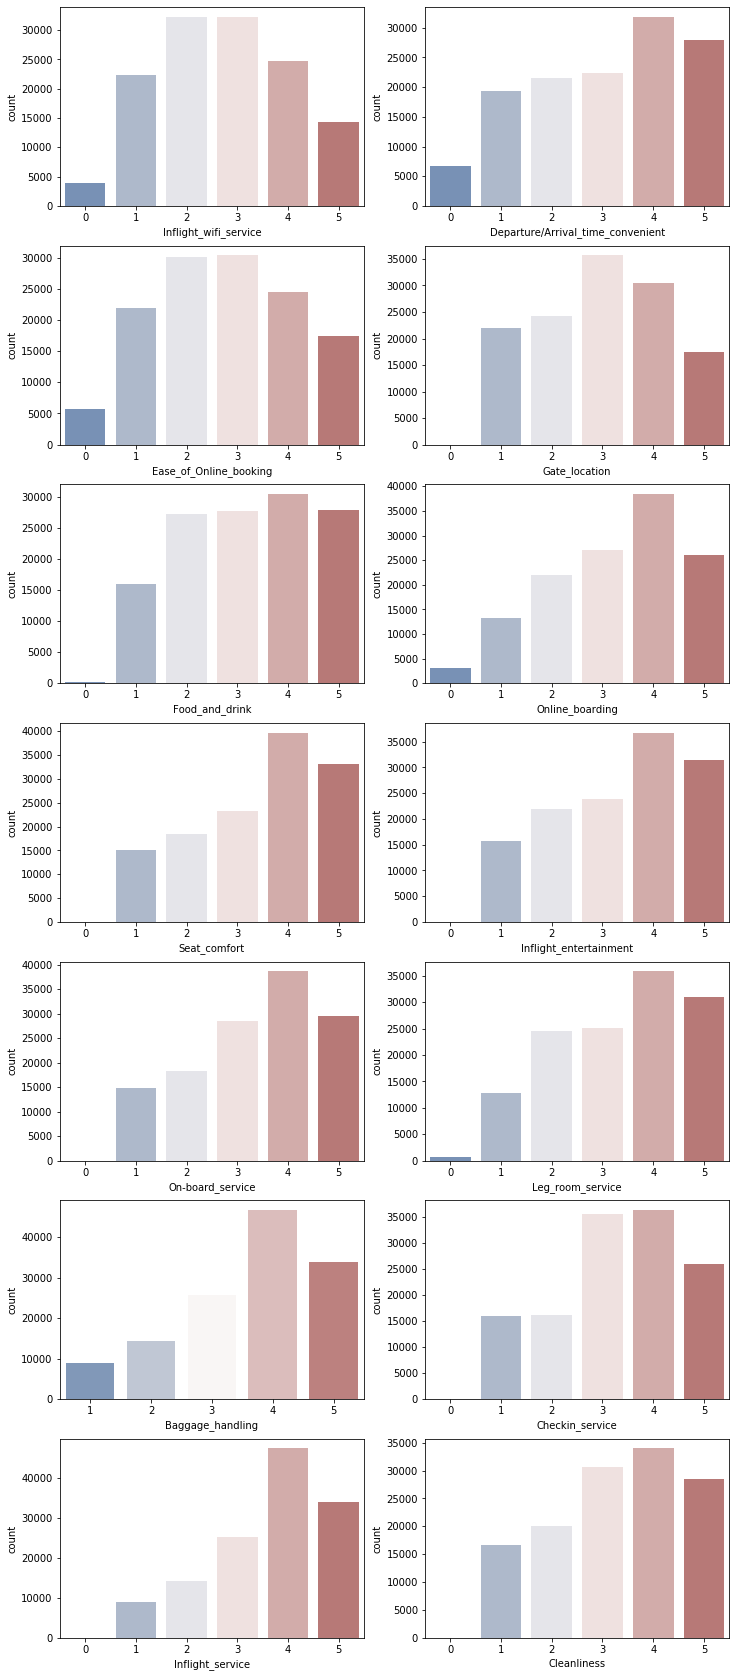

In [28]:
service_rating_columns = ['Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness']

fig,axes = plt.subplots(7,2,figsize=(12,30))

for i, ser_col in enumerate(service_rating_columns):
    #plt.figure(i)
    row,col = i//2,i%2
    #sns.countplot(x = ser_col, color='blue', data=combined_df,ax=axes[row,col])
    #sns.palplot(sns.color_palette("RdBu", n_colors=7))
    sns.countplot(x = ser_col, palette="vlag", data=combined_df,ax=axes[row,col])
    
plt.subplots_adjust(hspace=0.2)


In [29]:
combined_df.Inflight_wifi_service.value_counts()

2    32310
3    32172
4    24771
1    22311
5    14356
0     3915
Name: Inflight_wifi_service, dtype: int64

In [30]:
customer_details_columns = [ 'Gender', 'Customer_Type',
       'Type_of_Travel', 'Class']

for each_col in customer_details_columns:
    col_grp = combined_df[[each_col,'satisfaction_int']].groupby([each_col])['satisfaction_int'].agg('mean').reset_index(name='satisfied')
    count_grp = combined_df[[each_col,'satisfaction_int']].groupby([each_col])['satisfaction_int'].count().reset_index(name='Count')
    satisfied_count = combined_df[combined_df['satisfaction_int']==1].groupby([each_col])['satisfaction_int'].count().reset_index(name='Count')
    col_grp['satisfied_count'] = satisfied_count.Count.values
    col_grp['tot_count'] = count_grp.Count.values
    col_grp['population_percentage'] = ((col_grp['tot_count']*100)/len(combined_df))/100
    print("**************")
    print(col_grp)
    print("**************\n")
    col_grp.to_csv("saved_stats/"+each_col+".csv")

**************
   Gender  satisfied  satisfied_count  tot_count  population_percentage
0  Female   0.429044            28262      65872               0.507352
1    Male   0.440176            28155      63963               0.492648
**************

**************
       Customer_Type  satisfied  satisfied_count  tot_count  \
0     Loyal Customer   0.478210            50717     106056   
1  disloyal Customer   0.239707             5700      23779   

   population_percentage  
0               0.816852  
1               0.183148  
**************

**************
    Type_of_Travel  satisfied  satisfied_count  tot_count  \
0  Business travel   0.583895            52345      89648   
1  Personal Travel   0.101326             4072      40187   

   population_percentage  
0               0.690476  
1               0.309524  
**************

**************
      Class  satisfied  satisfied_count  tot_count  population_percentage
0  Business   0.694760            43155      62115               0

In [31]:
len(combined_df)

129835

In [32]:
numeric_columns = ['Age', 'Flight_Distance']


for each_col in numeric_columns:
    
    bins = []
    labels = []
    last_i = 0
    for i in range(math.floor(combined_df[each_col].min()),math.ceil(combined_df[each_col].max()),int(combined_df[each_col].std())+1) :
        range_start = i
        bins.append(i)
        std_val = int(combined_df[each_col].std())
        range_end = (i + std_val) if (i + std_val) < combined_df[each_col].max() else combined_df[each_col].max()
        labels.append(str(range_start) + '-' + str(range_end))
        last_i = i
    bins.append(combined_df[each_col].max())
    
    temp_df = combined_df
    temp_col = each_col + '_range'
    temp_df[temp_col] = pd.cut(temp_df[each_col], bins, labels = labels,include_lowest = True)
    col_grp = temp_df[[temp_col,'satisfaction_int']].groupby([temp_col])['satisfaction_int'].agg('mean').reset_index(name='satisfied')
    count_grp = temp_df[[temp_col,'satisfaction_int']].groupby([temp_col])['satisfaction_int'].count().reset_index(name='Count')
    satisfied_count = temp_df[temp_df['satisfaction_int']==1].groupby([temp_col])['satisfaction_int'].count().reset_index(name='Count')
    col_grp['satisfied_count'] = satisfied_count.Count.values
    col_grp['tot_count'] = count_grp.Count.values
    col_grp['population_percentage'] = ((col_grp['tot_count']*100)/len(combined_df))/100
    print("**************")
    print(col_grp)
    print("**************\n")
    col_grp.to_csv("saved_stats/"+each_col+".csv")

**************
  Age_range  satisfied  satisfied_count  tot_count  population_percentage
0      7-22   0.261754             5712      21822               0.168075
1     23-38   0.390464            16485      42219               0.325174
2     39-54   0.579017            25779      44522               0.342912
3     55-70   0.400744             8184      20422               0.157292
4     71-85   0.302353              257        850               0.006547
**************

**************
  Flight_Distance_range  satisfied  satisfied_count  tot_count  \
0               31-1027   0.330646            25465      77016   
1             1028-2024   0.473091            12421      26255   
2             2025-3021   0.649991            10732      16511   
3             3022-4018   0.777544             7756       9975   
4             4019-4983   0.551282               43         78   

   population_percentage  
0               0.593184  
1               0.202218  
2               0.127169  
3    

In [33]:
numeric_columns = ['Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']


for each_col in numeric_columns:
    
    bins = []
    labels = []
    last_i = 0
    for i in range(math.floor(combined_df[each_col].min()),math.ceil(combined_df[each_col].max()),int(combined_df[each_col].std()*10)+1) :
        range_start = i
        bins.append(i)
        std_val = int(combined_df[each_col].std()*10)
        range_end = (i + std_val) if (i + std_val) < combined_df[each_col].max() else combined_df[each_col].max()
        labels.append(str(range_start) + '-' + str(range_end))
        last_i = i
    bins.append(combined_df[each_col].max())
    
    temp_df = combined_df
    temp_col = each_col + '_range'
    temp_df[temp_col] = pd.cut(temp_df[each_col], bins, labels = labels,include_lowest = True)
    col_grp = temp_df[[temp_col,'satisfaction_int']].groupby([temp_col])['satisfaction_int'].agg('mean').reset_index(name='satisfied')
    count_grp = temp_df[[temp_col,'satisfaction_int']].groupby([temp_col])['satisfaction_int'].count().reset_index(name='Count')
    satisfied_count = temp_df[temp_df['satisfaction_int']==1].groupby([temp_col])['satisfaction_int'].count().reset_index(name='Count')
    col_grp['satisfied_count'] = satisfied_count.Count.values
    col_grp['tot_count'] = count_grp.Count.values
    col_grp['population_percentage'] = ((col_grp['tot_count']*100)/len(combined_df))/100
    print("**************")
    print(col_grp)
    print("**************\n")
    col_grp.to_csv("saved_stats/"+each_col+".csv")

**************
  Departure_Delay_in_Minutes_range  satisfied  satisfied_count  tot_count  \
0                            0-380   0.434568            56367     129708   
1                          381-761   0.403509               46        114   
2                         762-1142   0.272727                3         11   
3                        1143-1523   1.000000                1          1   
4                        1524-1592   0.000000                0          1   

   population_percentage  
0               0.999022  
1               0.000878  
2               0.000085  
3               0.000008  
4               0.000008  
**************

**************
  Arrival_Delay_in_Minutes_range  satisfied  satisfied_count  tot_count  \
0                          0-383   0.434587            56369     129707   
1                        384-767   0.382609               44        115   
2                       768-1151   0.272727                3         11   
3                      1152-1

In [34]:
serv_columns = [ 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness']

for each_col in serv_columns:
    col_grp = combined_df[[each_col,'satisfaction_int']].groupby([each_col])['satisfaction_int'].agg('mean').reset_index(name='satisfied')
    count_grp = combined_df[[each_col,'satisfaction_int']].groupby([each_col])['satisfaction_int'].count().reset_index(name='Count')
    satisfied_count = combined_df[combined_df['satisfaction_int']==1].groupby([each_col])['satisfaction_int'].count().reset_index(name='Count')
    
    if 0 not in satisfied_count[each_col].values :
        missing_rating = []
        missing_rating.insert(0, {each_col: 0, 'Count': 0})
        satisfied_count = pd.concat([pd.DataFrame(missing_rating), satisfied_count], ignore_index=True)
    if 0 not in col_grp[each_col].values :
        missing_rating = []
        missing_rating.insert(0, {each_col: 0, 'satisfied': 0})
        col_grp = pd.concat([pd.DataFrame(missing_rating), col_grp], ignore_index=True)
    if 0 not in count_grp[each_col].values :
        missing_rating = []
        missing_rating.insert(0, {each_col: 0, 'Count': 0})
        count_grp = pd.concat([pd.DataFrame(missing_rating), count_grp], ignore_index=True)
    #if(each_col=='Baggage_handling'):
       # pdb.set_trace()
    col_grp['satisfied_count'] = satisfied_count.Count.values
    col_grp['tot_count'] = count_grp.Count.values
    col_grp['population_percentage'] = ((col_grp['tot_count']*100)/len(combined_df))/100
    print("**************")
    print(col_grp)
    print("**************\n")
    col_grp.to_csv("saved_stats/"+each_col.replace("/","")+".csv")

**************
   Inflight_wifi_service  satisfied  satisfied_count  tot_count  \
0                      0   0.997446             3905       3915   
1                      1   0.328224             7323      22311   
2                      2   0.247292             7990      32310   
3                      3   0.251803             8101      32172   
4                      4   0.600824            14883      24771   
5                      5   0.990178            14215      14356   

   population_percentage  
0               0.030154  
1               0.171841  
2               0.248854  
3               0.247791  
4               0.190788  
5               0.110571  
**************

**************
   Departure/Arrival_time_convenient  satisfied  satisfied_count  tot_count  \
0                                  0   0.481138             3214       6680   
1                                  1   0.490513             9513      19394   
2                                  2   0.444821           

In [35]:
demograph_grp = combined_df[['Gender', 'Customer_Type', 'Type_of_Travel', 'Class','satisfaction_int']].groupby(['Gender', 'Customer_Type', 'Type_of_Travel', 'Class'])['satisfaction_int'].mean().reset_index(name='Mean')
model = ols('Mean ~ C(Gender) + C(Customer_Type) + C(Type_of_Travel) + C(Class) + C(Gender):C(Customer_Type) + C(Gender):C(Type_of_Travel) + C(Gender):C(Class) + C(Customer_Type):C(Type_of_Travel) + C(Customer_Type):C(Class) + C(Type_of_Travel):C(Class)', data=demograph_grp).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Gender),4.916854e-05,1.0,0.073124,7.936862e-01
C(Customer_Type),2.566145e-01,1.0,381.642168,4.899508e-08
C(Type_of_Travel),5.983456e-01,1.0,889.871453,1.729478e-09
C(Class),1.089149e-01,2.0,80.990190,4.906421e-06
C(Gender):C(Customer_Type),2.608318e-06,1.0,0.003879,9.518656e-01
C(Gender):C(Type_of_Travel),6.559715e-07,1.0,0.000976,9.758480e-01
C(Gender):C(Class),1.934904e-04,2.0,0.143881,8.681819e-01
C(Customer_Type):C(Type_of_Travel),1.427789e-01,1.0,212.343678,4.821945e-07
C(Customer_Type):C(Class),1.652452e-02,2.0,12.287798,3.637395e-03
C(Type_of_Travel):C(Class),1.455634e-01,2.0,108.242419,1.612917e-06


In [36]:
temp_df = combined_df
temp_df.columns=[each.replace("/","_") for each in temp_df.columns]
temp_df.columns=[each.replace("-","_") for each in temp_df.columns]
service_grp = temp_df[['Inflight_wifi_service','Departure_Arrival_time_convenient', 'Ease_of_Online_booking','Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort','Inflight_entertainment', 'On_board_service', 'Leg_room_service','Baggage_handling', 'Checkin_service', 'Inflight_service','Cleanliness','satisfaction_int']].groupby(['Inflight_wifi_service','Departure_Arrival_time_convenient', 'Ease_of_Online_booking','Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort','Inflight_entertainment', 'On_board_service', 'Leg_room_service','Baggage_handling', 'Checkin_service', 'Inflight_service','Cleanliness'])['satisfaction_int'].mean().reset_index(name='Mean')

model = ols('Mean ~ C(Inflight_wifi_service) + C(Departure_Arrival_time_convenient) + C(Ease_of_Online_booking) + C(Gate_location) + C(Food_and_drink) + C(Online_boarding) + C(Seat_comfort) + C(Inflight_entertainment) + C(On_board_service) + C(Leg_room_service) + C(Baggage_handling) + C(Checkin_service) + C(Inflight_service) + C(Cleanliness) ', data=service_grp).fit()

sm.stats.anova_lm(model, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
C(Inflight_wifi_service),5.0,8594.550741,1718.910148,17004.980872,0.000000e+00
C(Departure_Arrival_time_convenient),5.0,786.868899,157.373780,1556.880746,0.000000e+00
C(Ease_of_Online_booking),5.0,145.581321,29.116264,288.043862,3.551629e-307
C(Gate_location),5.0,247.008688,49.401738,488.725722,0.000000e+00
C(Food_and_drink),5.0,329.491840,65.898368,651.924994,0.000000e+00
C(Online_boarding),5.0,1793.291490,358.658298,3548.165391,0.000000e+00
C(Seat_comfort),5.0,129.072922,25.814584,255.380722,3.030723e-272
C(Inflight_entertainment),5.0,639.766535,127.953307,1265.827386,0.000000e+00
C(On_board_service),5.0,295.454594,59.090919,584.579679,0.000000e+00
C(Leg_room_service),5.0,303.659549,60.731910,600.813816,0.000000e+00


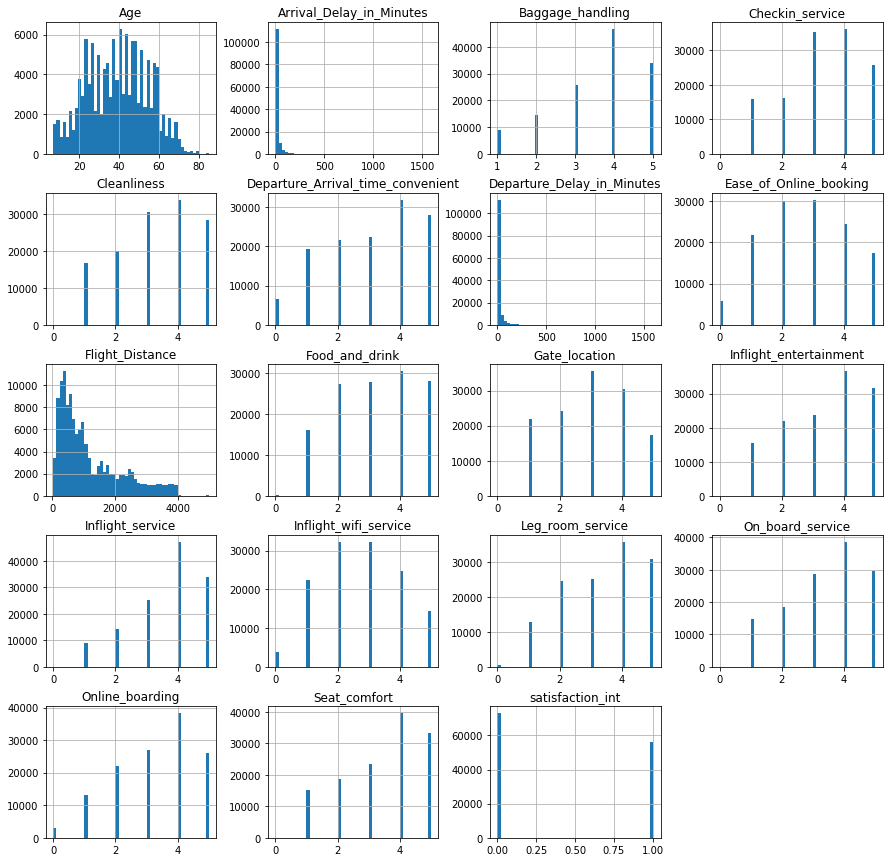

In [37]:
combined_df.hist(bins=50, figsize=(15,15));

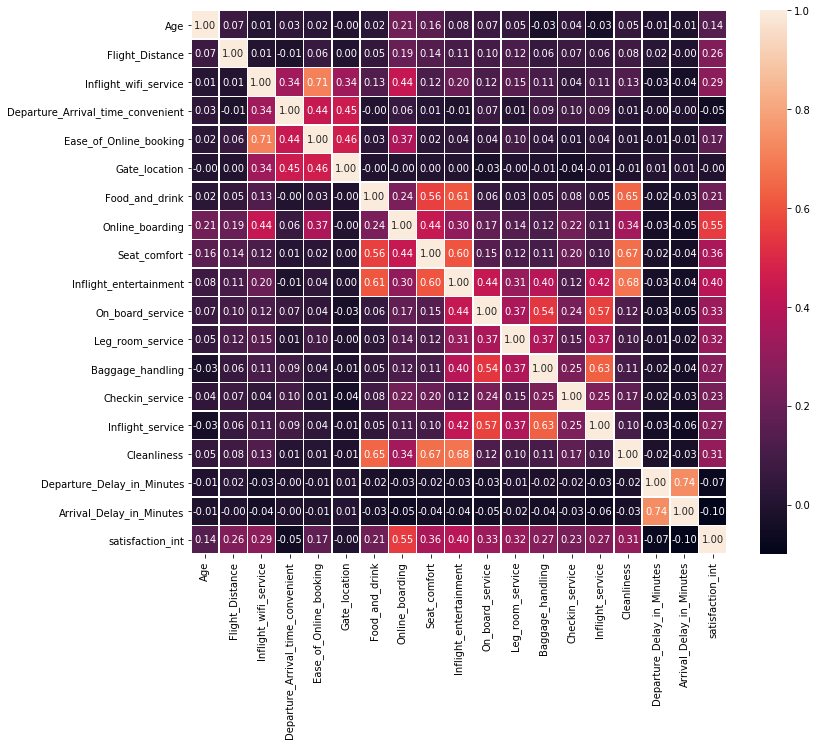

In [38]:
corr_mat = combined_df.corr(method='spearman')
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_mat, ax=ax, annot=True, linewidths=0.5,fmt=".2f")

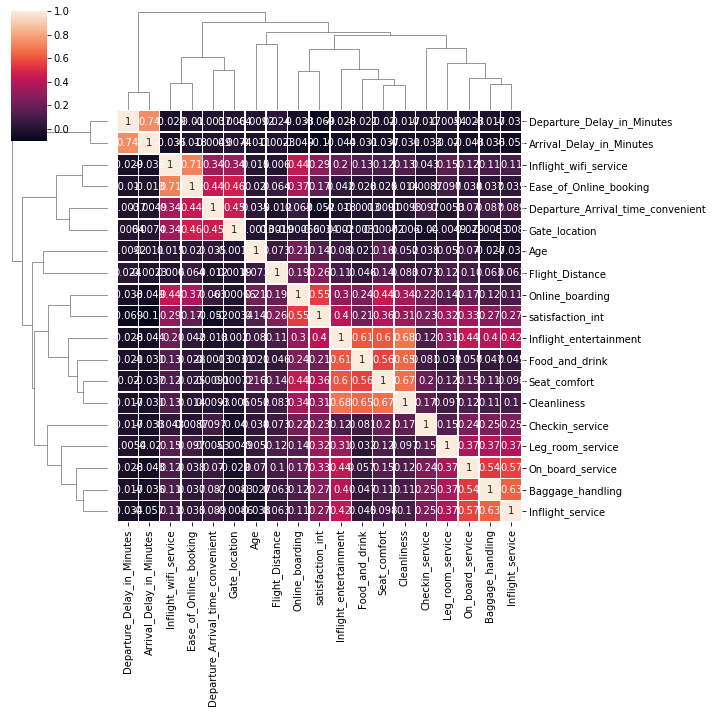

In [39]:
corrmat = combined_df.corr(method='spearman')
cg = sns.clustermap(corrmat, annot=True, linewidths=0.5);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
cg